# Excitation and depumping (together) rate

We use the following notations:

![energy_levels](figures/energy_levels.png)

- $N_1(t)$ is the numer of 6p atoms by time.
- $N_2(t)$ is the number of 70s atoms by time.
- $N_{Mot}$ is the total number of atoms in the Mot, we assume it stable.

We assume the following system of equations for the rates:

- 1) equation for $N_2$:
    - depends on the number of atoms in the mot times the excitation rate.
    - depends on the number of states in the rydberg state that decades for both spontaneus (neglectble) and stimolated emission in the 6p.
    - we neglect the transition 6p-70s couse of the detuning that make it neglectble.

$
\frac{dN_2}{dt} = N_{Mot} \Gamma_{exc} - N_2 \Gamma_{ryd} + N_1 \Gamma_{ry}
$

- 1) equation for $N_1$:
    - depends on the number of atoms in the 6p times the decay rate.
    - depends on the number of states in the rydberg state that decades for both spontaneus (neglectble) and stimolated emission in the 6p.

$
\frac{dN_1}{dt} = - N_{1} (\Gamma_{6p}+\Gamma_{ry}) + N_2 \Gamma_{ry}
$

Putting the initial condition $N_1(0)=N_2(0)=0$ the solutions are:

$
N_2(t) = \frac{N_{Mot} \Gamma_{exc}}{\Gamma_{ry}}(1-e^{-\Gamma_{ry}t})
$

$
N_1(t) = \frac{N_{Mot} \Gamma_{exc}}{\Gamma_{6p}}(1-e^{-\Gamma_{6p}t})+\frac{N_{Mot} \Gamma_{exc}}{\Gamma_{6p}-\Gamma_{ry}}(e^{-\Gamma_{6p}t}-e^{-\Gamma_{ry}t})
$

In [18]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [19]:
def N2(t, Gamma_ry, N_Mot, Gamma_exc): return (1-np.exp(-Gamma_ry*t))*N_Mot*Gamma_exc/Gamma_ry

def N1(t, Gamma_ry, N_Mot, Gamma_exc, Gamma_6p): return N_Mot*Gamma_exc*(1-np.exp(-Gamma_6p*t))*(1/Gamma_6p) + N_Mot*Gamma_exc*(np.exp(-Gamma_6p*t)-np.exp(-Gamma_ry*t))/(-Gamma_ry+Gamma_6p)

In [28]:
Gamma_ry=np.linspace(0.001,2,500)

t=10 #np.linspace(0.001,5,500)
Gamma_6p = 10
N_Mot = 10000
Gamma_exc = 1/N_Mot

N1_values = N1(t, Gamma_ry, N_Mot, Gamma_exc, Gamma_6p)

N2_values = N2(t, Gamma_ry, N_Mot, Gamma_exc)


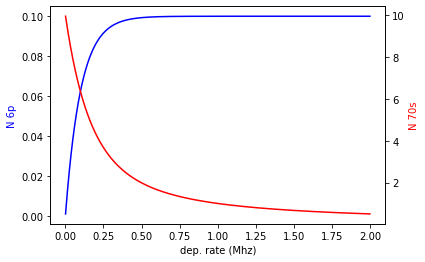

In [29]:
fig, ax1 = plt.subplots()

ax1.plot(Gamma_ry, N1_values, label="N_6p", color="b")
ax1.set_ylabel('N 6p', color="b")

ax2 = ax1.twinx() 


ax2.plot(Gamma_ry, N2_values, label="N_ry", color="r")
ax2.set_ylabel('N 70s', color="r")

ax1.set_xlabel("dep. rate (Mhz)")

plt.show()

In [26]:
Gamma_ry=0.1

t=np.linspace(0.001,100,500)
Gamma_6p = 10
N_Mot = 10000
Gamma_exc = 1/N_Mot

N1_values = N1(t, Gamma_ry, N_Mot, Gamma_exc, Gamma_6p)

N2_values = N2(t, Gamma_ry, N_Mot, Gamma_exc)

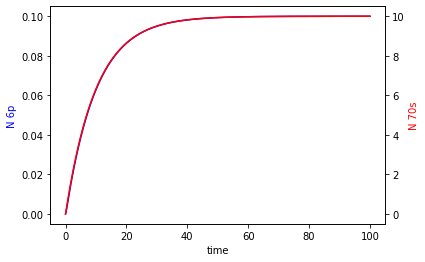

In [27]:
fig, ax1 = plt.subplots()

ax1.plot(t, N1_values, label="N_6p", color="b")
ax1.set_ylabel('N 6p', color="b")

ax2 = ax1.twinx() 


ax2.plot(t, N2_values, label="N_ry", color="r")
ax2.set_ylabel('N 70s', color="r")

ax1.set_xlabel("time")

plt.show()